<a href="https://colab.research.google.com/github/BharatXBhalla/Deep-Learning-CDAC/blob/main/LSTM/StockMarketPrediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install quandl

In [9]:
import quandl

In [10]:
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2021-01-01')


In [11]:
aapl=quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)

In [13]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2018-03-21,171.270000
2018-03-22,168.845000
2018-03-23,164.940000


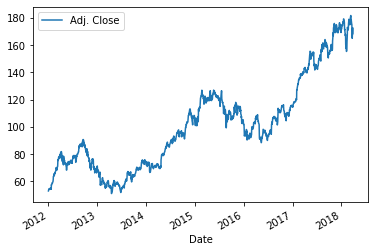

In [14]:
aapl.plot()

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scalar = MinMaxScaler()
df=scalar.fit_transform(aapl)

In [19]:
import matplotlib.pyplot as plt

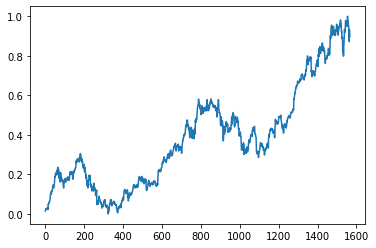

In [20]:
plt.plot(df)

In [21]:
# Spliting my data into train and test

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
train_size = int(len(df)*0.8)

In [200]:
train_size

1252

In [201]:
test_size=len(df)-train_size

In [202]:
test_size

314

In [203]:
train_data = df[0:train_size,:]
test_data = df[train_size:,:]

In [204]:
train_data.shape

(1252, 1)

In [205]:
test_data.shape

(314, 1)

In [206]:
pd.DataFrame(train_data).head()

,0
0,0.014680
1,0.016851
2,0.021361
3,0.025655
4,0.024997


In [207]:
def time_series_x_y(timesteps,data):
  y=data[timesteps:,:]
  x=[]
  for i,index in zip(y,range(0,len(y))):
    x.append(train_data[0+index:0+index+timesteps])
  
  x=np.array(x)

  return x,y

In [208]:
timestep = 30
x_train,y_train = time_series_x_y(timestep,train_data)

In [209]:
x_test,y_test = time_series_x_y(timestep,test_data)

In [210]:
y_train.shape , x_train.shape

((1222, 1), (1222, 30, 1))

In [211]:
train_data.shape

(1252, 1)

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [227]:
model = Sequential()

model.add(LSTM(64, return_sequences=True,input_shape=(timestep,1)))
model.add(LSTM(32,dropout=0.5))
model.add(Dense(1,activation="relu"))

model.compile(loss="mean_squared_error",optimizer="adam")


In [228]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 30, 64)            16896     
                                                                 
 lstm_37 (LSTM)              (None, 32)                12416     
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train,y_train,
                  validation_data=(x_test,y_test)
                  ,epochs=100
                  ,batch_size=64,

                  verbose=1)

Epoch 1/100
20/20 [==============================] - 6s 96ms/step - loss: 0.0212 - val_loss: 0.4337
Epoch 2/100
20/20 [==============================] - 1s 42ms/step - loss: 0.0033 - val_loss: 0.4038
Epoch 3/100
20/20 [==============================] - 1s 42ms/step - loss: 0.0013 - val_loss: 0.4318
Epoch 4/100
20/20 [==============================] - 1s 41ms/step - loss: 0.0012 - val_loss: 0.4284
Epoch 5/100
20/20 [==============================] - 1s 43ms/step - loss: 0.0011 - val_loss: 0.4217
Epoch 6/100
20/20 [==============================] - 1s 43ms/step - loss: 0.0010 - val_loss: 0.4287
Epoch 7/100
20/20 [==============================] - 1s 43ms/step - loss: 0.0010 - val_loss: 0.4284
Epoch 8/100
20/20 [==============================] - 1s 44ms/step - loss: 9.9569e-04 - val_loss: 0.4212
Epoch 9/100
20/20 [==============================] - 1s 43ms/step - loss: 9.3848e-04 - val_loss: 0.4231
Epoch 10/100
20/20 [==============================] - 1s 45ms/step - loss: 9.3563e-04 - val_

In [226]:
def plot_history(history,label,parameter):
  plt.figure()
  plt.plot(history.history[parameter],label=label+" loss")
  plt.plot(history.history["val_"+parameter],label=label+" val loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

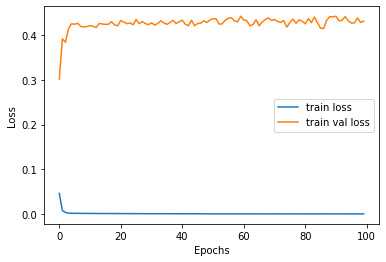

In [217]:
plot_history(history,"train","loss")

In [218]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

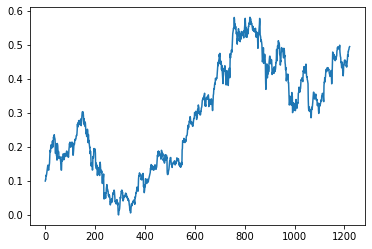

In [219]:
plt.plot(y_train)

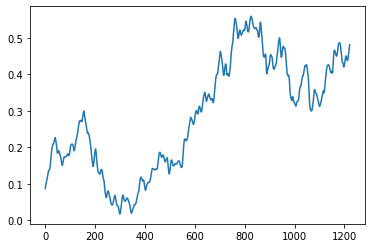

In [220]:
plt.plot(train_predict)

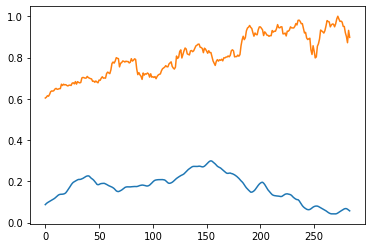

In [221]:
plt.plot(test_predict)
plt.plot(y_test)

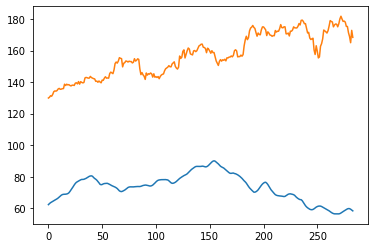

In [222]:
plt.plot(scalar.inverse_transform(test_predict))
plt.plot(scalar.inverse_transform(y_test))